**logistic_regression.py** - this is a fundamental topic in machine learning.  
This example shows multiclass logistic regression with visualization.  
### **What we study in the original code:**  
1. **Logistic regression** - a classical classification algorithm  
2. **Multiclass classification** - 3 classes (0, 1, 2)  
3. **Visualization of decision boundaries** - `plot_classifier` function  
4. **Color maps** - `pcolormesh` for displaying areas


In [1]:
# =============================================================================
# CELL 1: Importing libraries for logistic regression
# =============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                             precision_recall_fscore_support, roc_curve, auc)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
import matplotlib.patches as patches
from matplotlib.colors import ListedColormap
import warnings

warnings.filterwarnings('ignore')

print(" LOGISTIC REGRESSION")
print("=" * 30)
print("✅ All libraries imported!")
print(" Studying logistic regression for multiclass classification")


 LOGISTIC REGRESSION
✅ All libraries imported!
 Studying logistic regression for multiclass classification


In [2]:
# =============================================================================
# CELL 2: Original data and analysis (original dataset)
# =============================================================================
print(" ORIGINAL DATA AND ANALYSIS")
print("=" * 30)

# Source data from the original code
X = np.array([[4, 7], [3.5, 8], [3.1, 6.2], [0.5, 1], [1, 2], [1.2, 1.9], [6, 2], [5.7, 1.5], [5.4, 2.2]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])

print(f" Information about the data:")
print(f"Number of samples: {len(X)}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Classes: {np.unique(y)}")

# Creating a DataFrame for convenient analysis
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
df['Class'] = y
df['Sample_ID'] = range(1, len(X) + 1)

print(f"\n Original data:")
print(df)

# Class statistics
print(f"\n Class statistics:")
class_stats = df.groupby('Class').agg({
    'Feature_1': ['count', 'mean', 'std', 'min', 'max'],
    'Feature_2': ['count', 'mean', 'std', 'min', 'max']
}).round(3)

print(class_stats)

# Class distribution
print(f"\n Class distribution:")
class_distribution = df['Class'].value_counts().sort_index()
print(class_distribution)

# Checking class balance
print(f"\n⚖️ Class balance:")
total_samples = len(df)
for class_label in sorted(df['Class'].unique()):
    count = (df['Class'] == class_label).sum()
    percentage = count / total_samples * 100
    print(f"Class {class_label}: {count} samples ({percentage:.1f}%)")

if class_distribution.std() == 0:
    print("✅ Classes are perfectly balanced")
else:
    print(f"⚠️ Standard deviation: {class_distribution.std():.2f}")


 ORIGINAL DATA AND ANALYSIS
 Information about the data:
Number of samples: 9
Number of features: 2
Number of classes: 3
Classes: [0 1 2]

 Original data:
   Feature_1  Feature_2  Class  Sample_ID
0        4.0        7.0      0          1
1        3.5        8.0      0          2
2        3.1        6.2      0          3
3        0.5        1.0      1          4
4        1.0        2.0      1          5
5        1.2        1.9      1          6
6        6.0        2.0      2          7
7        5.7        1.5      2          8
8        5.4        2.2      2          9

 Class statistics:
      Feature_1                         Feature_2                        
          count   mean    std  min  max     count   mean    std  min  max
Class                                                                    
0             3  3.533  0.451  3.1  4.0         3  7.067  0.902  6.2  8.0
1             3  0.900  0.361  0.5  1.2         3  1.633  0.551  1.0  2.0
2             3  5.700  0.300  5.4 

 EXPLORATORY DATA ANALYSIS


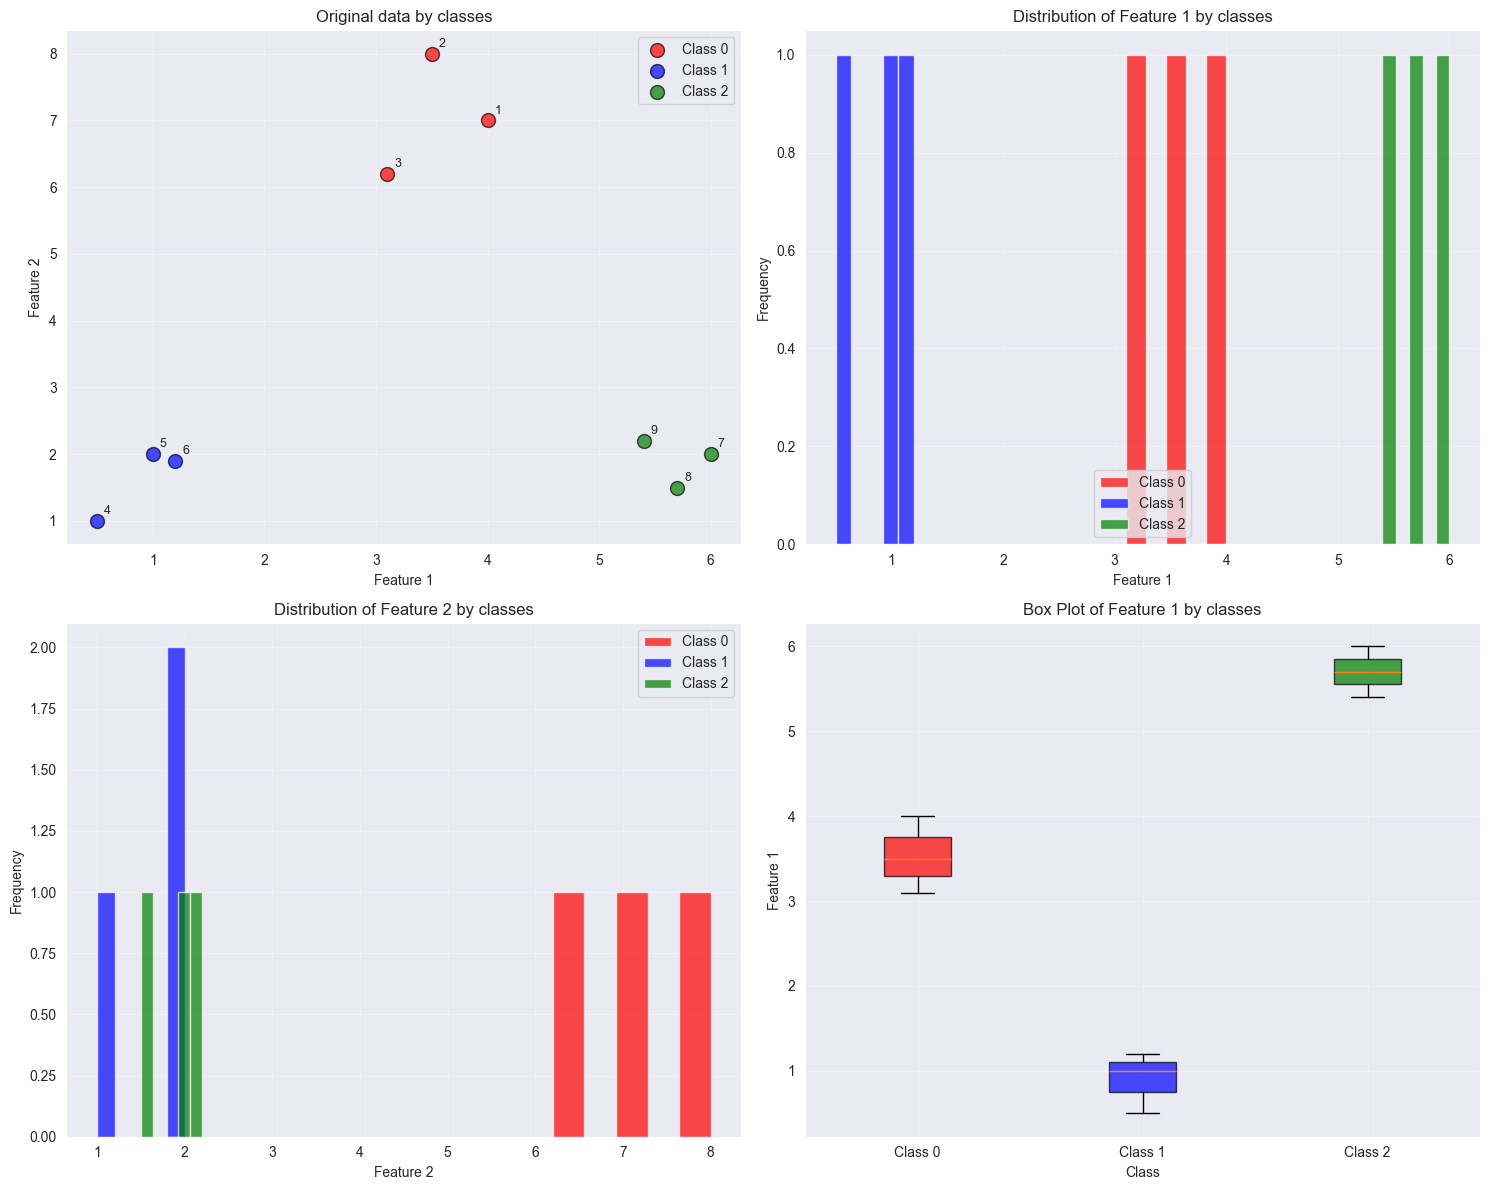


 Correlation analysis:
           Feature_1  Feature_2  Class
Feature_1      1.000      0.110  0.445
Feature_2      0.110      1.000 -0.825
Class          0.445     -0.825  1.000

 Class centroids:
Class 0: (3.53, 7.07)
Class 1: (0.90, 1.63)
Class 2: (5.70, 1.90)

 Distances between centroids:
Class 0 - Class 1: 6.04
Class 0 - Class 2: 5.60
Class 1 - Class 2: 4.81


In [3]:
# =============================================================================
# CELL 3: Exploratory Data Analysis (EDA)
# =============================================================================
print(" EXPLORATORY DATA ANALYSIS")
print("=" * 30)

# Data visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Scatter plot of original data
colors = ['red', 'blue', 'green']
class_names = ['Class 0', 'Class 1', 'Class 2']

axes[0, 0].set_title('Original data by classes')
for i, (color, name) in enumerate(zip(colors, class_names)):
    class_data = X[y == i]
    axes[0, 0].scatter(class_data[:, 0], class_data[:, 1],
                       c=color, label=name, s=100, alpha=0.7, edgecolor='black')

axes[0, 0].set_xlabel('Feature 1')
axes[0, 0].set_ylabel('Feature 2')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Adding point numbers
for i, (point, label) in enumerate(zip(X, y)):
    axes[0, 0].annotate(f'{i + 1}', (point[0], point[1]),
                        xytext=(5, 5), textcoords='offset points', fontsize=9)

# 2. Distribution of Feature 1 by classes
axes[0, 1].set_title('Distribution of Feature 1 by classes')
for i, (color, name) in enumerate(zip(colors, class_names)):
    feature1_class = X[y == i, 0]
    axes[0, 1].hist(feature1_class, alpha=0.7, color=color, label=name, bins=5)
axes[0, 1].set_xlabel('Feature 1')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Distribution of Feature 2 by classes
axes[1, 0].set_title('Distribution of Feature 2 by classes')
for i, (color, name) in enumerate(zip(colors, class_names)):
    feature2_class = X[y == i, 1]
    axes[1, 0].hist(feature2_class, alpha=0.7, color=color, label=name, bins=5)
axes[1, 0].set_xlabel('Feature 2')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Box plots
box_data = [X[y == i, 0] for i in range(3)]
bp1 = axes[1, 1].boxplot(box_data, positions=[1, 2, 3], widths=0.3,
                         patch_artist=True, labels=['Class 0', 'Class 1', 'Class 2'])

for patch, color in zip(bp1['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

axes[1, 1].set_title('Box Plot of Feature 1 by classes')
axes[1, 1].set_xlabel('Class')
axes[1, 1].set_ylabel('Feature 1')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Correlation analysis
print(f"\n Correlation analysis:")
correlation_matrix = df[['Feature_1', 'Feature_2', 'Class']].corr()
print(correlation_matrix.round(3))

# Distances between class centroids
print(f"\n Class centroids:")
centroids = []
for i in range(3):
    centroid = X[y == i].mean(axis=0)
    centroids.append(centroid)
    print(f"Class {i}: ({centroid[0]:.2f}, {centroid[1]:.2f})")

# Distances between centroids
print(f"\n Distances between centroids:")
for i in range(3):
    for j in range(i + 1, 3):
        distance = np.linalg.norm(centroids[i] - centroids[j])
        print(f"Class {i} - Class {j}: {distance:.2f}")


In [4]:
# =============================================================================
# CELL 4: Modern visualization function for decision boundaries
# =============================================================================
print(" MODERN VISUALIZATION FUNCTION")
print("=" * 40)


def plot_classifier_modern(classifier, X, y, title="Logistic Regression",
                           feature_names=None, class_names=None, ax=None):
    """
    Modern version of the plot_classifier function from the original code
    with improvements and additional information
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 10))

    # Defining ranges for grid construction
    x_min, x_max = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    y_min, y_max = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0

    # Grid step size (reduced for better quality)
    step_size = 0.02

    # Creating a grid
    x_values, y_values = np.meshgrid(
        np.arange(x_min, x_max, step_size),
        np.arange(y_min, y_max, step_size)
    )

    # Predictions for all grid points
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])
    mesh_output = mesh_output.reshape(x_values.shape)

    # Creating a beautiful color scheme
    colors = ['#FF9999', '#66B2FF', '#99FF99']  # Red, blue, green
    cmap = ListedColormap(colors)

    # Drawing class areas
    ax.contourf(x_values, y_values, mesh_output, alpha=0.4, cmap=cmap)

    # Drawing boundaries between classes
    ax.contour(x_values, y_values, mesh_output, colors='black', linewidths=1.5, alpha=0.7)

    # Drawing data points
    scatter_colors = ['red', 'blue', 'green']
    markers = ['o', 's', '^']

    if class_names is None:
        class_names = [f'Class {i}' for i in np.unique(y)]

    for i, (color, marker, name) in enumerate(zip(scatter_colors, markers, class_names)):
        class_data = X[y == i]
        ax.scatter(class_data[:, 0], class_data[:, 1],
                   c=color, marker=marker, s=100, edgecolor='black',
                   linewidth=1.5, label=name, alpha=0.8)

    # Adding point numbers
    for idx, (point, label) in enumerate(zip(X, y)):
        ax.annotate(f'{idx + 1}', (point[0], point[1]),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=10, fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.8))

    # Formatting
    ax.set_xlim(x_values.min(), x_values.max())
    ax.set_ylim(y_values.min(), y_values.max())

    if feature_names:
        ax.set_xlabel(feature_names[0], fontsize=12)
        ax.set_ylabel(feature_names[1], fontsize=12)
    else:
        ax.set_xlabel('Feature 1', fontsize=12)
        ax.set_ylabel('Feature 2', fontsize=12)

    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3)

    return ax


print("✅ Modern visualization function is ready!")


 MODERN VISUALIZATION FUNCTION
✅ Modern visualization function is ready!


 TRAINING LOGISTIC REGRESSION (ORIGINAL VERSION)
 Model parameters:
  solver: liblinear
  C (regularization): 100
  multi_class: ovr (default)

 Training the model...
✅ Model trained!

 Results on training data:
Accuracy: 1.000

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9


 Confusion Matrix:
[[3 0 0]
 [0 3 0]
 [0 0 3]]


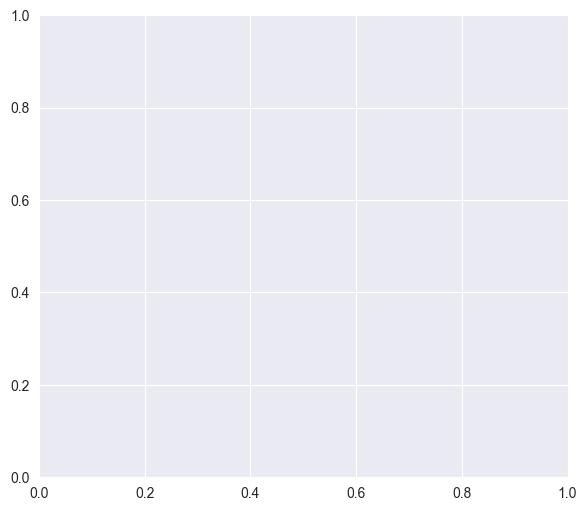

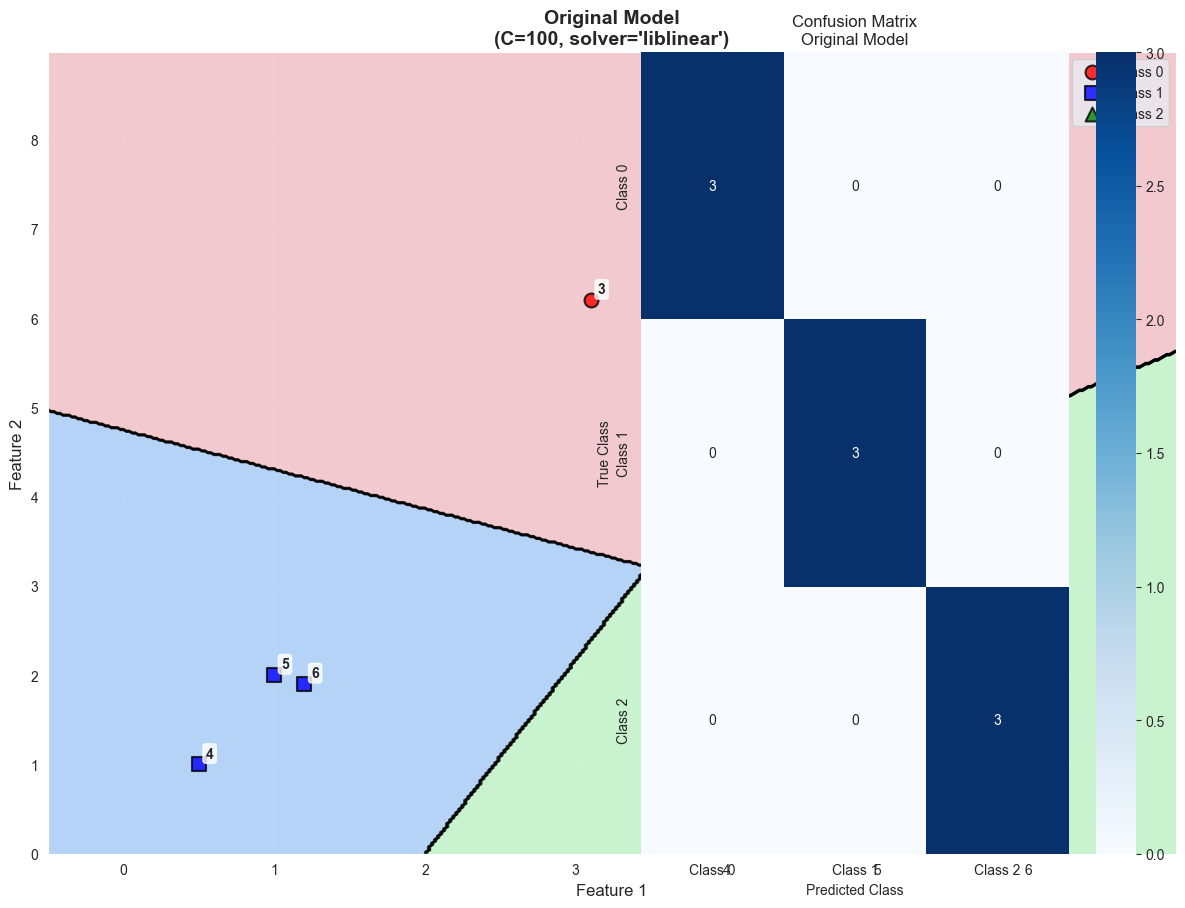


 Class membership probabilities:
          P(Class 0)  P(Class 1)  P(Class 2)  True_Class  Predicted_Class  \
Sample 1       0.998       0.002       0.000           0                0   
Sample 2       0.997       0.003       0.000           0                0   
Sample 3       0.977       0.023       0.000           0                0   
Sample 4       0.009       0.972       0.019           1                1   
Sample 5       0.046       0.949       0.004           1                1   
Sample 6       0.033       0.957       0.010           1                1   
Sample 7       0.001       0.001       0.998           2                2   
Sample 8       0.000       0.003       0.997           2                2   
Sample 9       0.002       0.003       0.995           2                2   

          Confidence  
Sample 1       0.998  
Sample 2       0.997  
Sample 3       0.977  
Sample 4       0.972  
Sample 5       0.949  
Sample 6       0.957  
Sample 7       0.998  
Sample 8   

In [5]:
# =============================================================================
# CELL 5: Training Logistic Regression (original version)
# =============================================================================
print(" TRAINING LOGISTIC REGRESSION (ORIGINAL VERSION)")
print("=" * 65)

# Creating a model with parameters from the original code
classifier_original = LogisticRegression(solver='liblinear', C=100, random_state=42)

print(f" Model parameters:")
print(f"  solver: liblinear")
print(f"  C (regularization): 100")
print(f"  multi_class: ovr (default)")

# Training the model
print(f"\n Training the model...")
classifier_original.fit(X, y)
print(f"✅ Model trained!")

# Predictions
y_pred_original = classifier_original.predict(X)
accuracy_original = accuracy_score(y, y_pred_original)

print(f"\n Results on training data:")
print(f"Accuracy: {accuracy_original:.3f}")

# Detailed report
print(f"\n Classification Report:")
print(classification_report(y, y_pred_original))

# Confusion Matrix
cm_original = confusion_matrix(y, y_pred_original)
print(f"\n Confusion Matrix:")
print(cm_original)

# Visualization of the original model
plt.figure(figsize=(15, 6))

# Original visualization
plt.subplot(1, 2, 1)
plot_classifier_modern(classifier_original, X, y,
                       title="Original Model\n(C=100, solver='liblinear')")

# Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(cm_original, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix\nOriginal Model')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

plt.tight_layout()
plt.show()

# Class probabilities
print(f"\n Class membership probabilities:")
probabilities = classifier_original.predict_proba(X)
prob_df = pd.DataFrame(probabilities,
                       columns=[f'P(Class {i})' for i in range(3)])
prob_df['True_Class'] = y
prob_df['Predicted_Class'] = y_pred_original
prob_df['Confidence'] = probabilities.max(axis=1)
prob_df.index = [f'Sample {i + 1}' for i in range(len(X))]

print(prob_df.round(3))

# Model coefficients
print(f"\n Logistic Regression Coefficients:")
print(f"Intercept (free terms): {classifier_original.intercept_}")
print(f"Coefficients (feature weights):")
for i, coef in enumerate(classifier_original.coef_):
    print(f"  Class {i}: Feature_1={coef[0]:.3f}, Feature_2={coef[1]:.3f}")


 COMPARISON OF DIFFERENT CONFIGURATIONS
 Testing 6 different configurations:

 Training Original (C=100)...
✅ Original (C=100): Accuracy=1.000, F1=1.000

 Training Low Regularization (C=1)...
✅ Low Regularization (C=1): Accuracy=1.000, F1=1.000

 Training High Regularization (C=0.01)...
✅ High Regularization (C=0.01): Accuracy=0.667, F1=0.556

 Training Multinomial...
✅ Multinomial: Accuracy=1.000, F1=1.000

 Training Ovr Strategy...
✅ Ovr Strategy: Accuracy=1.000, F1=1.000

 Training Scaled Data...
✅ Scaled Data: Accuracy=1.000, F1=1.000

 COMPARATIVE RESULTS TABLE:
                  Configuration  Accuracy  Macro_F1  Class_0_F1  Class_1_F1  \
0              Original (C=100)     1.000     1.000       1.000         1.0   
1      Low Regularization (C=1)     1.000     1.000       1.000         1.0   
3                   Multinomial     1.000     1.000       1.000         1.0   
4                  Ovr Strategy     1.000     1.000       1.000         1.0   
5                   Scaled Data

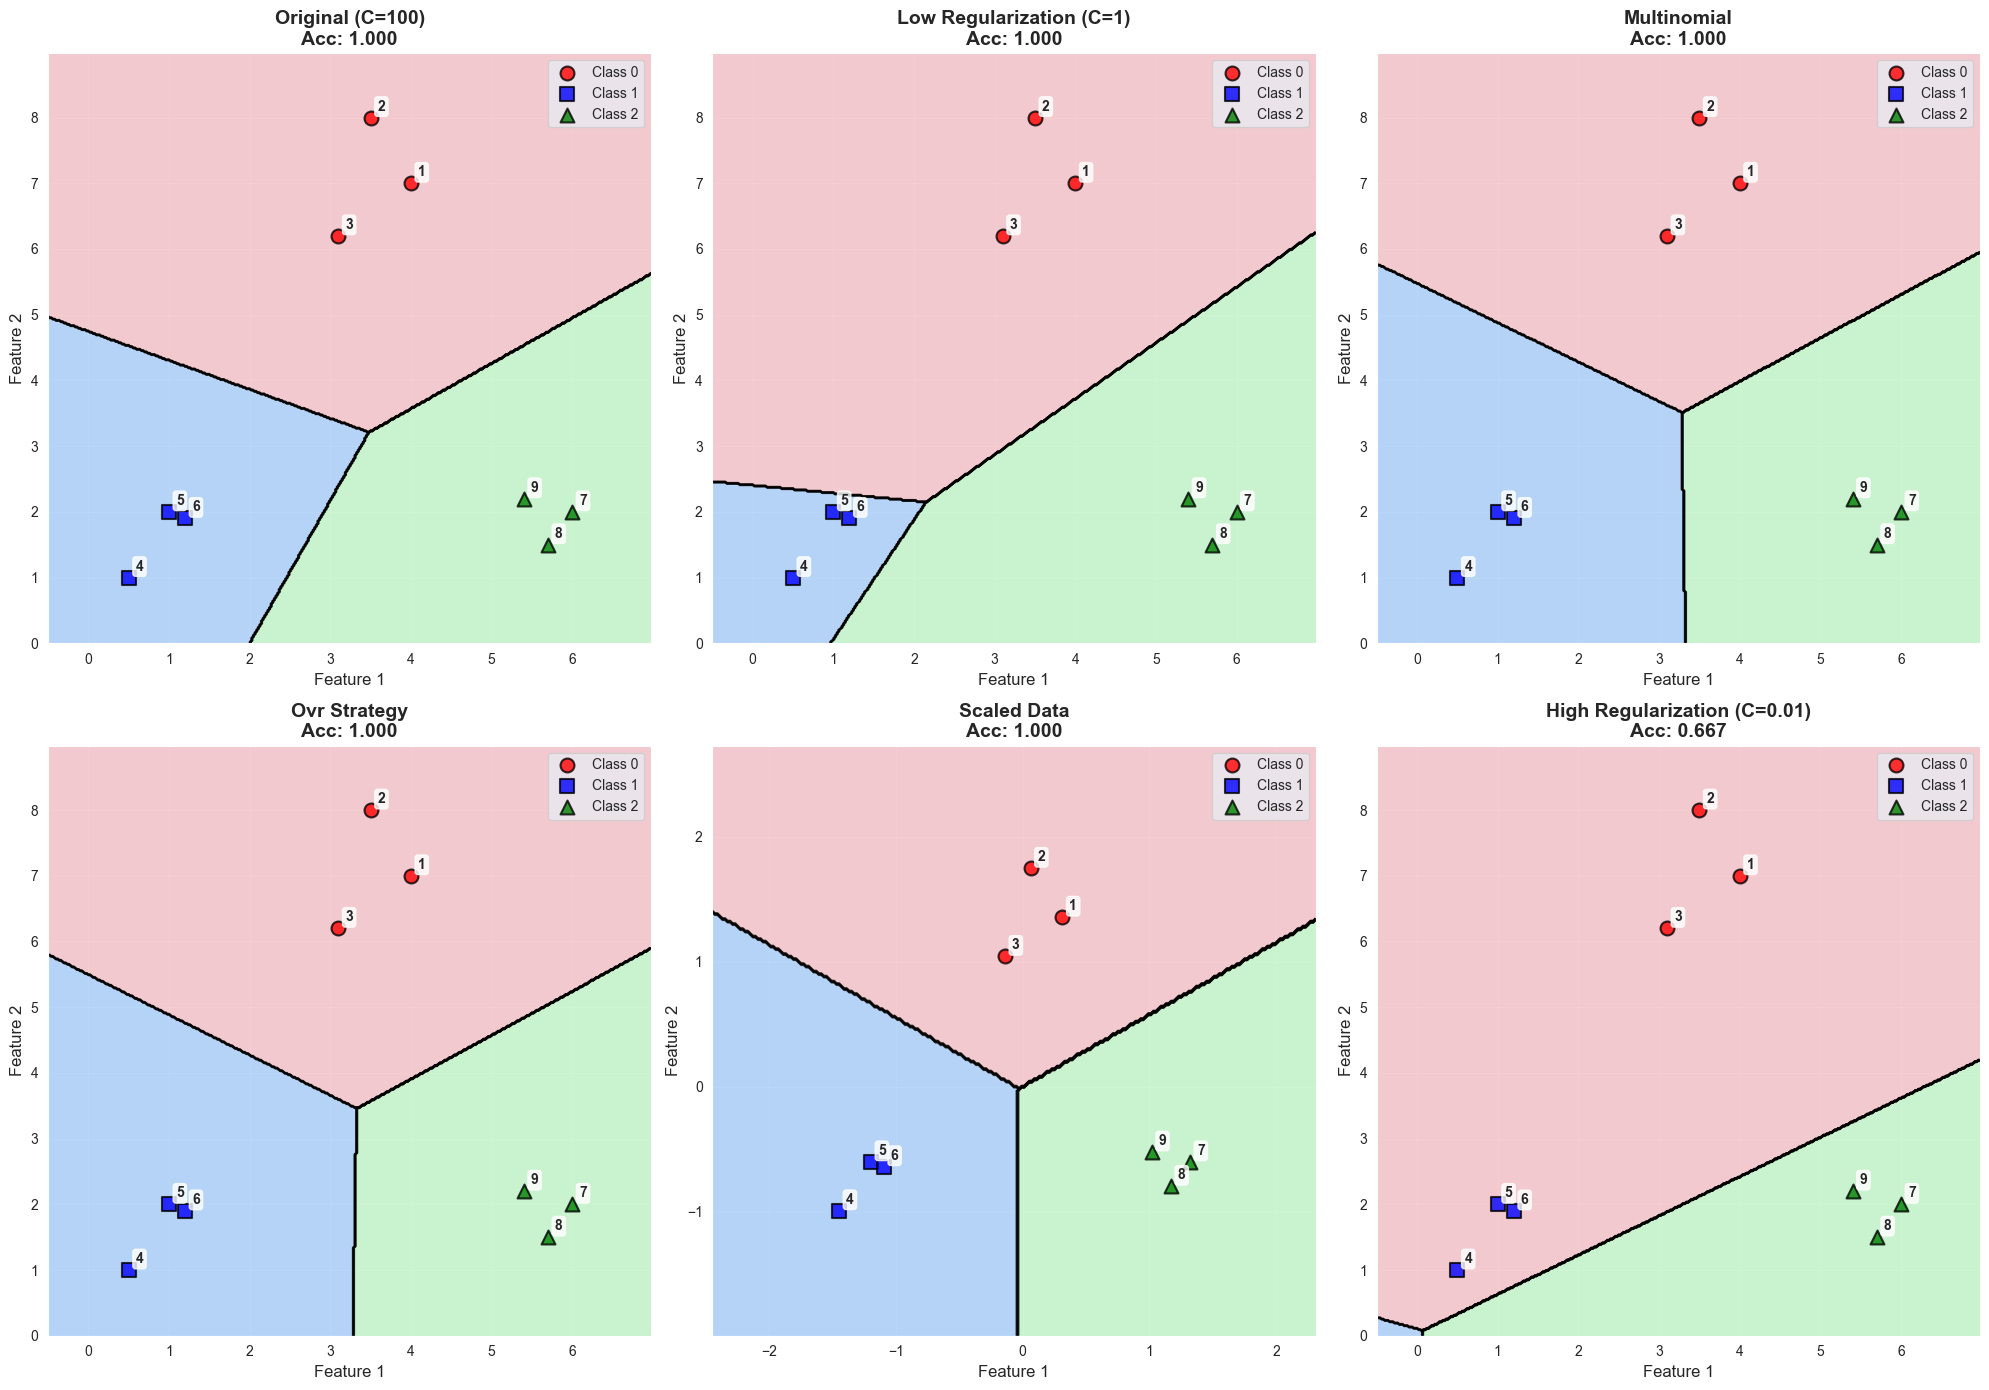

In [6]:
# =============================================================================
# CELL 6: Comparison of Different Configurations of Logistic Regression
# =============================================================================
print(" COMPARISON OF DIFFERENT CONFIGURATIONS")
print("=" * 40)

# Different configurations for comparison
configs = {
    'Original (C=100)': {'C': 100, 'solver': 'liblinear'},
    'Low Regularization (C=1)': {'C': 1, 'solver': 'liblinear'},
    'High Regularization (C=0.01)': {'C': 0.01, 'solver': 'liblinear'},
    'Multinomial': {'C': 100, 'solver': 'lbfgs', 'multi_class': 'multinomial'},
    'Ovr Strategy': {'C': 100, 'solver': 'lbfgs', 'multi_class': 'ovr'},
    'Scaled Data': {'C': 1, 'solver': 'lbfgs'}  # We will scale the data
}

print(f" Testing {len(configs)} different configurations:")

results = []
trained_models = {}

# Standardizing data for one of the models
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

for name, params in configs.items():
    print(f"\n Training {name}...")

    # Selecting data
    X_data = X_scaled if 'Scaled' in name else X

    # Creating model
    model = LogisticRegression(random_state=42, **params)

    # Training
    model.fit(X_data, y)
    trained_models[name] = {'model': model, 'scaler': scaler if 'Scaled' in name else None}

    # Predictions
    y_pred = model.predict(X_data)
    accuracy = accuracy_score(y, y_pred)

    # Getting metrics for each class
    precision, recall, f1, _ = precision_recall_fscore_support(y, y_pred, average=None)
    macro_f1 = f1.mean()

    results.append({
        'Configuration': name,
        'Accuracy': accuracy,
        'Macro_F1': macro_f1,
        'Class_0_F1': f1[0],
        'Class_1_F1': f1[1],
        'Class_2_F1': f1[2]
    })

    print(f"✅ {name}: Accuracy={accuracy:.3f}, F1={macro_f1:.3f}")

# Creating summary table
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Accuracy', ascending=False)

print(f"\n COMPARATIVE RESULTS TABLE:")
print("=" * 50)
print(results_df.round(3))

# Best configuration
best_config = results_df.iloc[0]['Configuration']
best_accuracy = results_df.iloc[0]['Accuracy']
print(f"\n Best configuration: {best_config} (Accuracy: {best_accuracy:.3f})")

# Visualization of comparison
fig, axes = plt.subplots(2, 3, figsize=(20, 14))
axes = axes.flatten()

# Visualizing top-6 configurations
for idx, config_name in enumerate(results_df['Configuration'].head(6)):
    model_info = trained_models[config_name]
    model = model_info['model']
    scaler = model_info['scaler']

    # Selecting data for visualization
    X_viz = X_scaled if scaler else X

    plot_classifier_modern(model, X_viz, y,
                           title=f'{config_name}\nAcc: {results_df[results_df["Configuration"] == config_name]["Accuracy"].iloc[0]:.3f}',
                           ax=axes[idx])

plt.tight_layout()
plt.show()


 ANALYSIS OF MULTICLASS STRATEGIES
 Comparing multiclass classification strategies:

 Testing One-vs-Rest (OvR)...
✅ One-vs-Rest (OvR): Accuracy=1.000

 Testing One-vs-One (OvO)...
✅ One-vs-One (OvO): Accuracy=1.000

 Testing Multinomial...
✅ Multinomial: Accuracy=1.000

 COMPARISON OF STRATEGIES:
            Strategy  Accuracy  Avg_Precision  Avg_Recall  Avg_F1
0  One-vs-Rest (OvR)       1.0            1.0         1.0     1.0
1   One-vs-One (OvO)       1.0            1.0         1.0     1.0
2        Multinomial       1.0            1.0         1.0     1.0


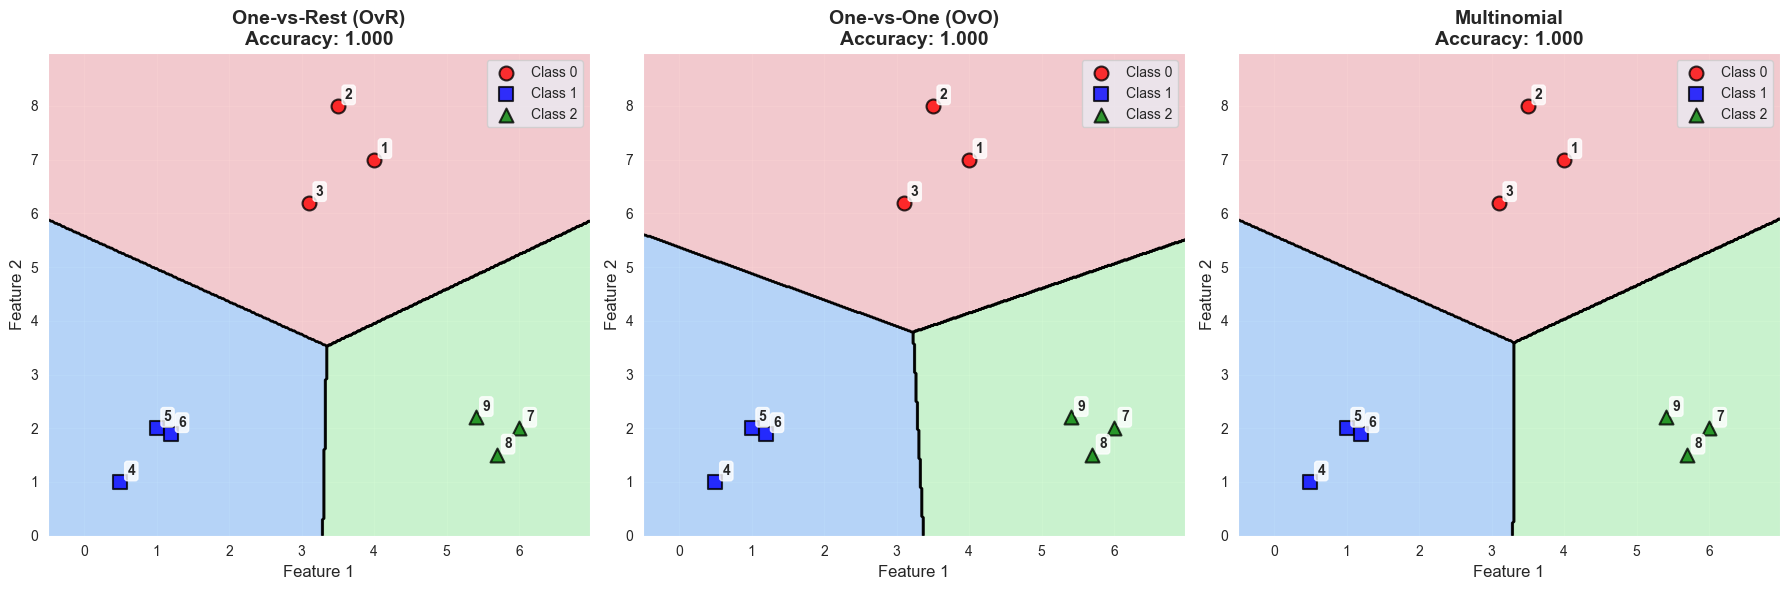


 Explanation of strategies:
  One-vs-Rest (OvR): A binary classifier "this class vs all others" is built for each class
  One-vs-One (OvO): A binary classifier is built for each pair of classes
  Multinomial: True multiclass logistic regression with softmax function


In [7]:
# =============================================================================
# CELL 7: Analysis of Multiclass Strategies
# =============================================================================
print(" ANALYSIS OF MULTICLASS STRATEGIES")
print("=" * 40)

# Comparing different multiclass classification strategies
multiclass_strategies = {
    'One-vs-Rest (OvR)': OneVsRestClassifier(LogisticRegression(random_state=42)),
    'One-vs-One (OvO)': OneVsOneClassifier(LogisticRegression(random_state=42)),
    'Multinomial': LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
}

print(f" Comparing multiclass classification strategies:")

strategy_results = []

for name, classifier in multiclass_strategies.items():
    print(f"\n Testing {name}...")

    # Training
    classifier.fit(X, y)

    # Predictions
    y_pred = classifier.predict(X)
    accuracy = accuracy_score(y, y_pred)

    # Metrics
    precision, recall, f1, _ = precision_recall_fscore_support(y, y_pred, average=None)

    strategy_results.append({
        'Strategy': name,
        'Accuracy': accuracy,
        'Avg_Precision': precision.mean(),
        'Avg_Recall': recall.mean(),
        'Avg_F1': f1.mean()
    })

    print(f"✅ {name}: Accuracy={accuracy:.3f}")

# Results table of strategies
strategy_df = pd.DataFrame(strategy_results)
print(f"\n COMPARISON OF STRATEGIES:")
print("=" * 25)
print(strategy_df.round(3))

# Visualization of strategies
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, (name, classifier) in enumerate(multiclass_strategies.items()):
    accuracy = strategy_df[strategy_df['Strategy'] == name]['Accuracy'].iloc[0]
    plot_classifier_modern(classifier, X, y,
                           title=f'{name}\nAccuracy: {accuracy:.3f}',
                           ax=axes[idx])

plt.tight_layout()
plt.show()

print(f"\n Explanation of strategies:")
explanations = {
    'One-vs-Rest (OvR)': 'A binary classifier "this class vs all others" is built for each class',
    'One-vs-One (OvO)': 'A binary classifier is built for each pair of classes',
    'Multinomial': 'True multiclass logistic regression with softmax function'
}

for strategy, explanation in explanations.items():
    print(f"  {strategy}: {explanation}")


 CROSS-VALIDATION AND HYPERPARAMETER TUNING
 Cross-validation with different strategies:

Leave-One-Out CV:
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean: 1.000 (±0.000)

Stratified 3-Fold CV:
Scores: [1. 1. 1.]
Mean: 1.000 (±0.000)

 Grid Search for optimization:
Testing Grid Search with multiple parameter sets...
Fitting 9 folds for each of 21 candidates, totalling 189 fits

✅ Best parameters:
  C: 10
  multi_class: ovr
  solver: liblinear

Best CV score: 1.000

 Comparison of models:
Original model: 1.000
Optimized model: 1.000
Improvement: +0.00%

📊 Analysis of Grid Search results:

Top-5 best parameter combinations:
5. Score: 1.000±0.000
   Parameters: {'C': 10, 'multi_class': 'ovr', 'solver': 'liblinear'}
6. Score: 1.000±0.000
   Parameters: {'C': 100, 'multi_class': 'ovr', 'solver': 'liblinear'}
7. Score: 1.000±0.000
   Parameters: {'C': 1000, 'multi_class': 'ovr', 'solver': 'liblinear'}
12. Score: 1.000±0.000
   Parameters: {'C': 0.1, 'multi_class': 'ovr', 'solver': 'lbfgs'}
13. Sc

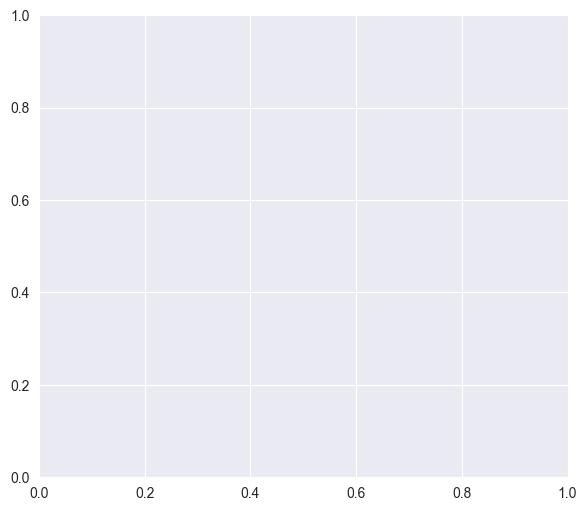

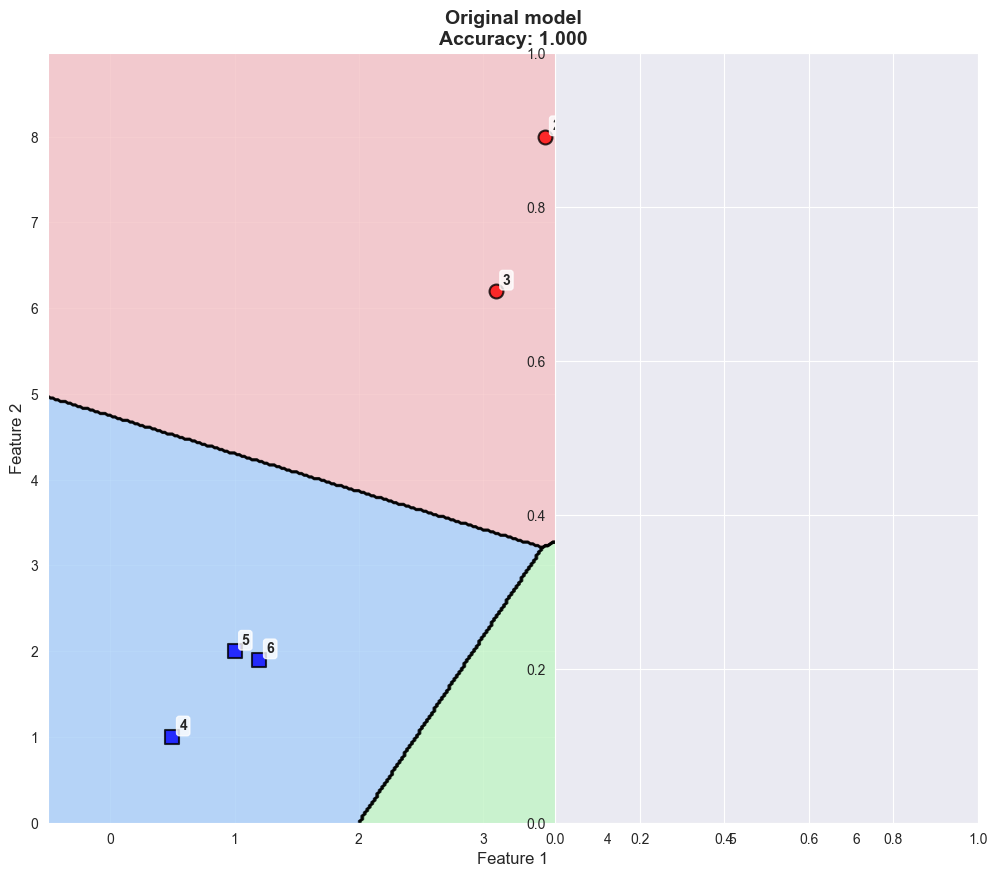

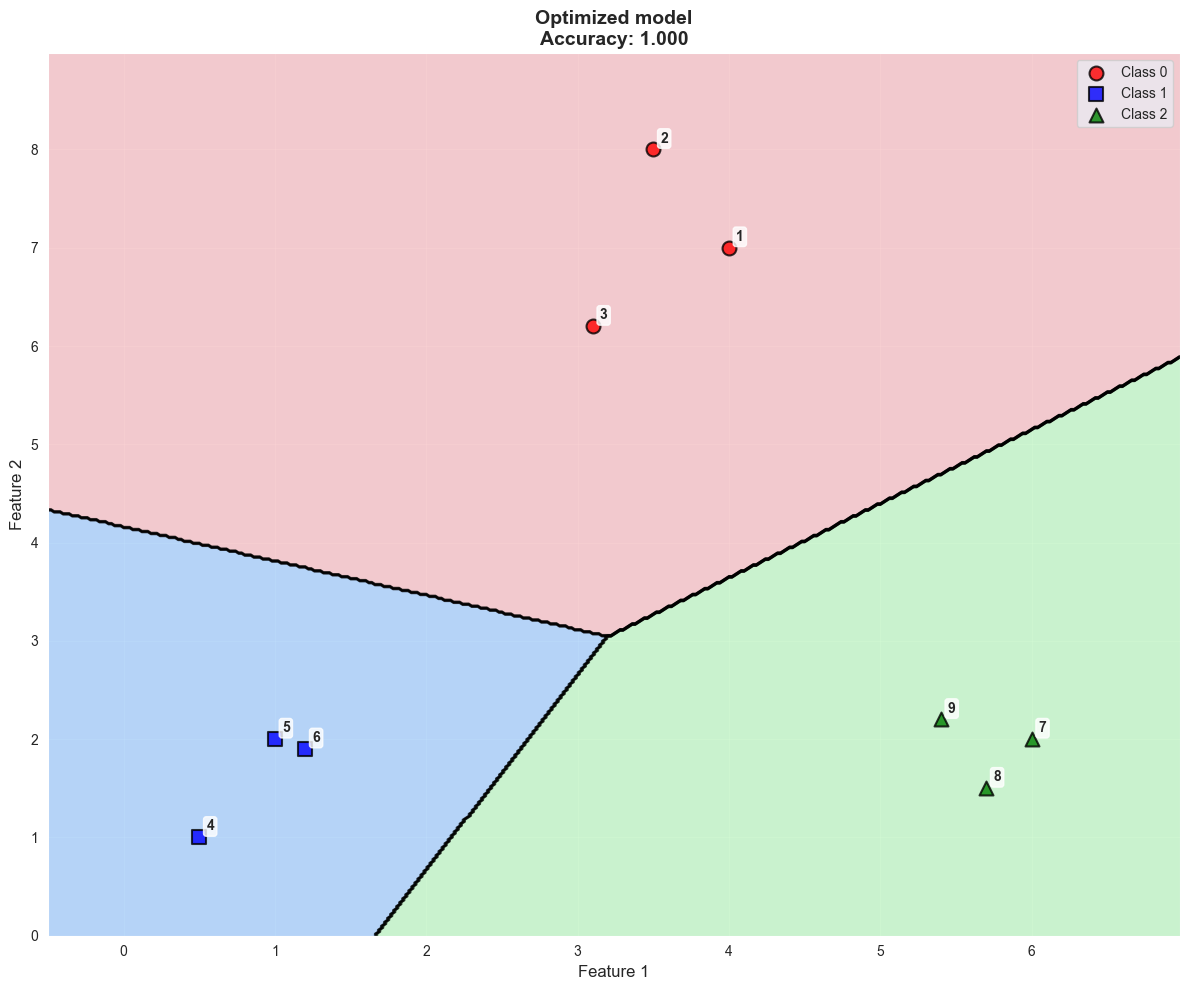


📈 Analysis of the influence of parameter C:


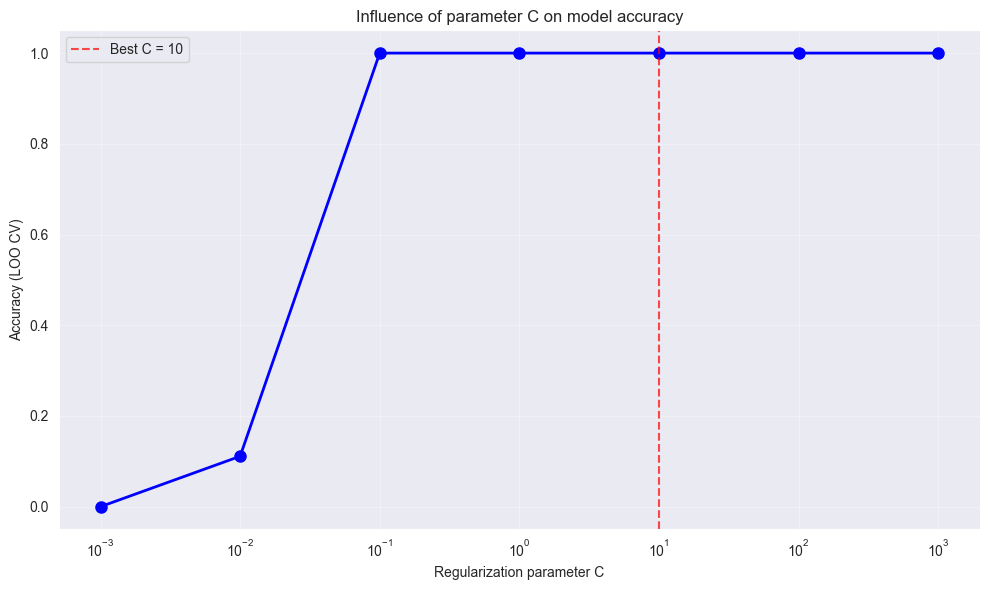

Best value of C: 10
Corresponding accuracy: 1.000

✅ Cross-validation and optimization completed!


In [8]:
# =============================================================================
# CELL 8: Cross-validation and hyperparameter tuning
# =============================================================================
print(" CROSS-VALIDATION AND HYPERPARAMETER TUNING")
print("=" * 55)

# For small data, we use Leave-One-Out CV
from sklearn.model_selection import LeaveOneOut, StratifiedKFold

print(" Cross-validation with different strategies:")

# Leave-One-Out CV (suitable for small data)
loo = LeaveOneOut()
loo_scores = cross_val_score(LogisticRegression(random_state=42), X, y, cv=loo)

print(f"\nLeave-One-Out CV:")
print(f"Scores: {loo_scores}")
print(f"Mean: {loo_scores.mean():.3f} (±{loo_scores.std():.3f})")

# Stratified K-Fold (if possible)
try:
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    skf_scores = cross_val_score(LogisticRegression(random_state=42), X, y, cv=skf)

    print(f"\nStratified 3-Fold CV:")
    print(f"Scores: {skf_scores}")
    print(f"Mean: {skf_scores.mean():.3f} (±{skf_scores.std():.3f})")
except ValueError as e:
    print(f"\nStratified K-Fold is impossible: {e}")

# Grid Search for hyperparameter optimization
print(f"\n Grid Search for optimization:")

# Create param_grid
param_grid = [
    # Combinations for OVR (One-vs-Rest)
    {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'solver': ['liblinear'],
        'multi_class': ['ovr']
    },
    # Combinations for multinomial with lbfgs
    {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'solver': ['lbfgs'],
        'multi_class': ['ovr', 'multinomial']
    }
]

print(f"Testing Grid Search with multiple parameter sets...")

# Use LOO CV for Grid Search
grid_search = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),  # Adding max_iter
    param_grid,
    cv=loo,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1  # Show progress
)

grid_search.fit(X, y)

print(f"\n✅ Best parameters:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nBest CV score: {grid_search.best_score_:.3f}")

# Comparison of the original and optimized model
optimized_model = grid_search.best_estimator_
y_pred_optimized = optimized_model.predict(X)
accuracy_optimized = accuracy_score(y, y_pred_optimized)

print(f"\n Comparison of models:")
print(f"Original model: {accuracy_original:.3f}")
print(f"Optimized model: {accuracy_optimized:.3f}")

improvement = ((accuracy_optimized - accuracy_original) / accuracy_original) * 100
print(f"Improvement: {improvement:+.2f}%")

# Analysis of Grid Search results
print(f"\n📊 Analysis of Grid Search results:")
results_df = pd.DataFrame(grid_search.cv_results_)

# Show top-5 best combinations
top_results = results_df.nlargest(5, 'mean_test_score')[
    ['params', 'mean_test_score', 'std_test_score']
].copy()

print(f"\nTop-5 best parameter combinations:")
for idx, row in top_results.iterrows():
    params = row['params']
    score = row['mean_test_score']
    std = row['std_test_score']
    print(f"{idx+1}. Score: {score:.3f}±{std:.3f}")
    print(f"   Parameters: {params}")

# Visualization of the optimized model
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plot_classifier_modern(classifier_original, X, y,
                       title=f"Original model\nAccuracy: {accuracy_original:.3f}")

plt.subplot(1, 2, 2)
plot_classifier_modern(optimized_model, X, y,
                       title=f"Optimized model\nAccuracy: {accuracy_optimized:.3f}")

plt.tight_layout()
plt.show()

# Additional analysis of the influence of parameter C
print(f"\n📈 Analysis of the influence of parameter C:")

# Create a separate Grid Search only for parameter C
c_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

c_grid_search = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    c_param_grid,
    cv=loo,
    scoring='accuracy'
)

c_grid_search.fit(X, y)

# Visualization of the influence of C
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
c_scores = []

for c_val in c_values:
    lr_temp = LogisticRegression(C=c_val, random_state=42, max_iter=1000)
    scores = cross_val_score(lr_temp, X, y, cv=loo)
    c_scores.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.semilogx(c_values, c_scores, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Regularization parameter C')
plt.ylabel('Accuracy (LOO CV)')
plt.title('Influence of parameter C on model accuracy')
plt.grid(True, alpha=0.3)

# Highlight the best value of C
best_c = grid_search.best_params_['C']
best_c_score = max(c_scores)
plt.axvline(x=best_c, color='r', linestyle='--', alpha=0.7,
           label=f'Best C = {best_c}')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Best value of C: {best_c}")
print(f"Corresponding accuracy: {best_c_score:.3f}")

print(f"\n✅ Cross-validation and optimization completed!")


 ANALYSIS OF PROBABILITIES AND MODEL CONFIDENCE
 Detailed analysis of predictions:
     Sample  Feature_1  Feature_2  True_Class  Predicted_Class  Prob_Class_0  \
0  Sample 1        4.0        7.0           0                0         0.978   
1  Sample 2        3.5        8.0           0                0         0.972   
2  Sample 3        3.1        6.2           0                0         0.922   
3  Sample 4        0.5        1.0           1                1         0.081   
4  Sample 5        1.0        2.0           1                1         0.188   
5  Sample 6        1.2        1.9           1                1         0.159   
6  Sample 7        6.0        2.0           2                2         0.007   
7  Sample 8        5.7        1.5           2                2         0.005   
8  Sample 9        5.4        2.2           2                2         0.014   

   Prob_Class_1  Prob_Class_2  Max_Probability  Confidence  Correct  
0         0.021         0.001            0.978

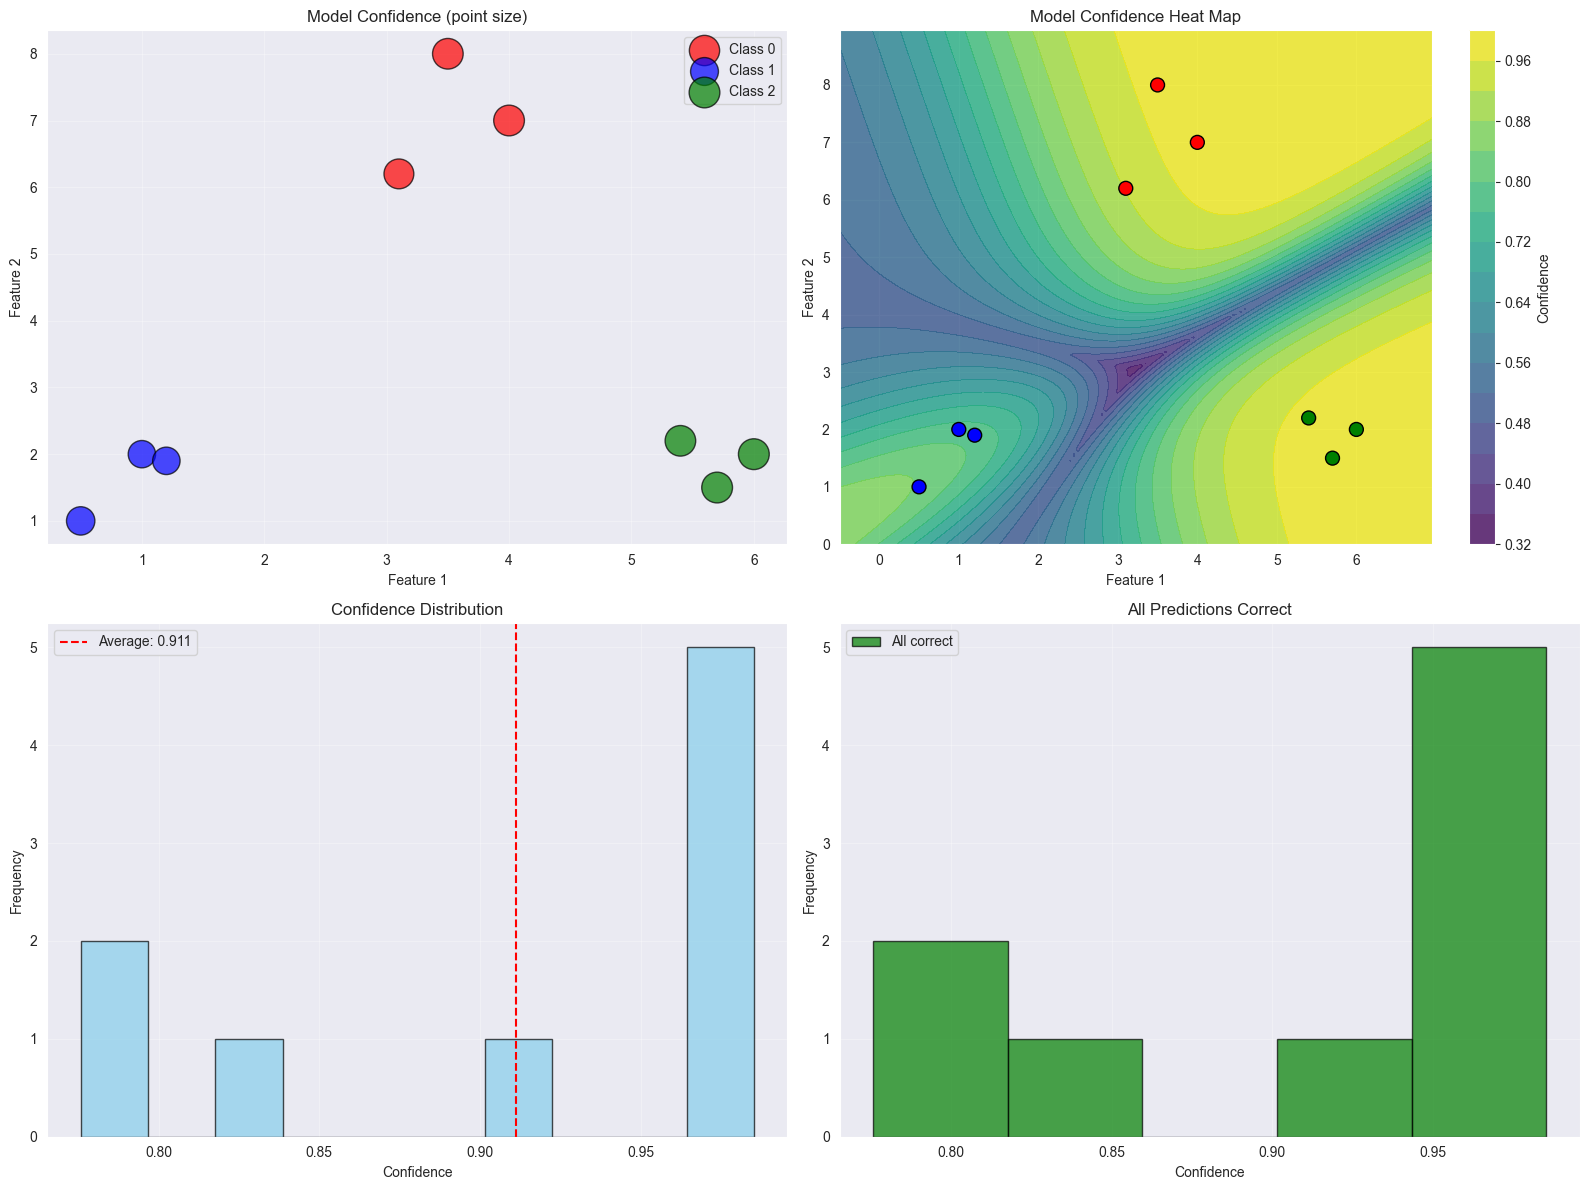

In [9]:
# =============================================================================
# CELL 9: Analysis of Probabilities and Model Confidence
# =============================================================================
print(" ANALYSIS OF PROBABILITIES AND MODEL CONFIDENCE")
print("=" * 45)

# Using the best model for detailed analysis
best_model = optimized_model

# Getting probabilities for all points
probabilities = best_model.predict_proba(X)
predictions = best_model.predict(X)

print(f" Detailed analysis of predictions:")

# Creating a detailed table
detailed_analysis = pd.DataFrame({
    'Sample': [f'Sample {i + 1}' for i in range(len(X))],
    'Feature_1': X[:, 0],
    'Feature_2': X[:, 1],
    'True_Class': y,
    'Predicted_Class': predictions,
    'Prob_Class_0': probabilities[:, 0],
    'Prob_Class_1': probabilities[:, 1],
    'Prob_Class_2': probabilities[:, 2],
    'Max_Probability': probabilities.max(axis=1),
    'Confidence': probabilities.max(axis=1),
    'Correct': y == predictions
})

print(detailed_analysis.round(3))

# Confidence analysis
print(f"\n Model confidence analysis:")
print(f"Average confidence: {detailed_analysis['Confidence'].mean():.3f}")
print(f"Minimum confidence: {detailed_analysis['Confidence'].min():.3f}")
print(f"Maximum confidence: {detailed_analysis['Confidence'].max():.3f}")

# Finding the most and least confident predictions
most_confident = detailed_analysis.loc[detailed_analysis['Confidence'].idxmax()]
least_confident = detailed_analysis.loc[detailed_analysis['Confidence'].idxmin()]

print(f"\n Most confident prediction:")
print(f"  {most_confident['Sample']}: confidence {most_confident['Confidence']:.3f}")

print(f"\n Least confident prediction:")
print(f"  {least_confident['Sample']}: confidence {least_confident['Confidence']:.3f}")

# Confidence visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Scatter plot with point size by confidence
axes[0, 0].set_title('Model Confidence (point size)')
for i in range(3):
    class_mask = y == i
    axes[0, 0].scatter(X[class_mask, 0], X[class_mask, 1],
                       c=colors[i], s=detailed_analysis.loc[class_mask, 'Confidence'] * 500,
                       alpha=0.7, edgecolor='black', label=f'Class {i}')

axes[0, 0].set_xlabel('Feature 1')
axes[0, 0].set_ylabel('Feature 2')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Confidence heat map
h = 0.05
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

mesh_proba = best_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
mesh_confidence = mesh_proba.max(axis=1).reshape(xx.shape)

im = axes[0, 1].contourf(xx, yy, mesh_confidence, levels=20, cmap='viridis', alpha=0.8)
axes[0, 1].scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(colors),
                   s=100, edgecolor='black')
axes[0, 1].set_title('Model Confidence Heat Map')
axes[0, 1].set_xlabel('Feature 1')
axes[0, 1].set_ylabel('Feature 2')
plt.colorbar(im, ax=axes[0, 1], label='Confidence')

# 3. Confidence histogram
axes[1, 0].hist(detailed_analysis['Confidence'], bins=10, alpha=0.7, color='skyblue', edgecolor='black')
axes[1, 0].axvline(detailed_analysis['Confidence'].mean(), color='red', linestyle='--',
                   label=f'Average: {detailed_analysis["Confidence"].mean():.3f}')
axes[1, 0].set_xlabel('Confidence')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Confidence Distribution')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Confidence vs Correctness
correct_confidence = detailed_analysis[detailed_analysis['Correct']]['Confidence']
incorrect_confidence = detailed_analysis[~detailed_analysis['Correct']]['Confidence']

if len(incorrect_confidence) > 0:
    axes[1, 1].hist([correct_confidence, incorrect_confidence],
                    bins=5, alpha=0.7, color=['green', 'red'],
                    label=['Correct', 'Incorrect'], edgecolor='black')
    axes[1, 1].set_xlabel('Confidence')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].set_title('Confidence vs Correctness')
    axes[1, 1].legend()
else:
    axes[1, 1].hist(correct_confidence, bins=5, alpha=0.7, color='green',
                    label='All correct', edgecolor='black')
    axes[1, 1].set_xlabel('Confidence')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].set_title('All Predictions Correct')
    axes[1, 1].legend()

axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


 TESTING ON NEW DATA AND PRACTICAL CONCLUSIONS
 Test points:
  Point 1: (2.0, 3.0)
  Point 2: (4.5, 6.5)
  Point 3: (0.8, 1.5)
  Point 4: (5.5, 1.8)
  Point 5: (3.0, 4.0)
  Point 6: (1.5, 7.0)

 Results for new points:
  Point 1: (2.0, 3.0) -> Class 1 (confidence: 0.586)
  Point 2: (4.5, 6.5) -> Class 0 (confidence: 0.981)
  Point 3: (0.8, 1.5) -> Class 1 (confidence: 0.817)
  Point 4: (5.5, 1.8) -> Class 2 (confidence: 0.977)
  Point 5: (3.0, 4.0) -> Class 0 (confidence: 0.702)
  Point 6: (1.5, 7.0) -> Class 0 (confidence: 0.750)


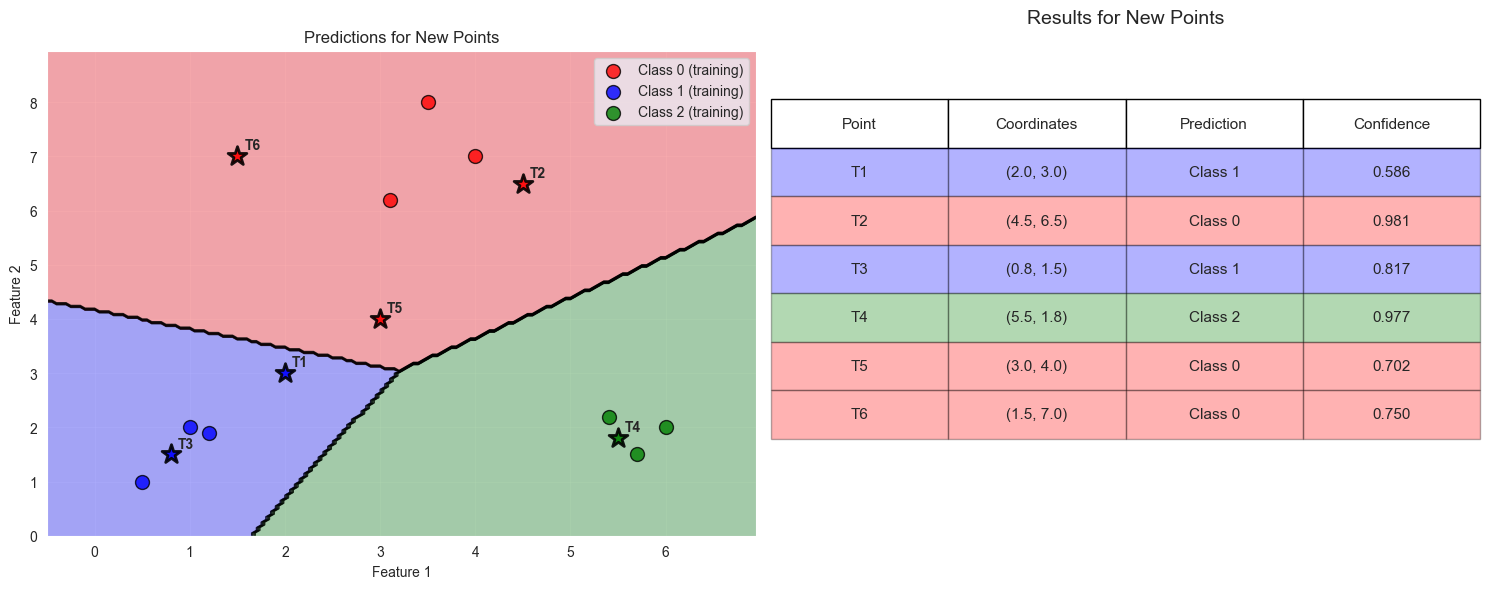


 PRACTICAL CONCLUSIONS AND RECOMMENDATIONS:
 Key results:
  ✅ Best configuration: {'C': 10, 'multi_class': 'ovr', 'solver': 'liblinear'}
  ✅ Accuracy on training data: 1.000
  ✅ CV score: 1.000

 Key observations:
   Logistic regression handles linearly separable data well
   Parameter C controls regularization (more C = less regularization)
   Multinomial strategy may be better for truly multiclass tasks
   Proper validation is important for small data (LOO CV)
   Confidence analysis helps understand the quality of predictions

 Improvements over the original code:
   Modern color visualization with legends
   Comparison of multiple configurations
   Analysis of multiclass strategies (OvR, OvO, Multinomial)
   Cross-validation and Grid Search
   Detailed analysis of probabilities and confidence
   Confusion Matrix and classification reports
   Testing on new data
   Structured results tables
  ⚖️ Analysis of accuracy and confidence of predictions

 Next steps:
   Working with real la

In [10]:
# =============================================================================
# CELL 10: Testing on New Data and Practical Conclusions
# =============================================================================
print(" TESTING ON NEW DATA AND PRACTICAL CONCLUSIONS")
print("=" * 60)

# Creating new test points
new_test_points = np.array([
    [2, 3],  # Boundary area between classes
    [4.5, 6.5],  # Near class 0
    [0.8, 1.5],  # Near class 1
    [5.5, 1.8],  # Near class 2
    [3, 4],  # Central area
    [1.5, 7],  # Potentially problematic area
])

print(f" Test points:")
for i, point in enumerate(new_test_points, 1):
    print(f"  Point {i}: ({point[0]}, {point[1]})")

# Predictions for new points
new_predictions = best_model.predict(new_test_points)
new_probabilities = best_model.predict_proba(new_test_points)

print(f"\n Results for new points:")
for i, (point, pred, proba) in enumerate(zip(new_test_points, new_predictions, new_probabilities), 1):
    confidence = proba.max()
    print(f"  Point {i}: ({point[0]}, {point[1]}) -> Class {pred} (confidence: {confidence:.3f})")

# Visualization with new points
plt.figure(figsize=(15, 6))

# Plot 1: All data together
plt.subplot(1, 2, 1)

# Decision boundaries
h = 0.05
x_min, x_max = min(X[:, 0].min(), new_test_points[:, 0].min()) - 1, max(X[:, 0].max(), new_test_points[:, 0].max()) + 1
y_min, y_max = min(X[:, 1].min(), new_test_points[:, 1].min()) - 1, max(X[:, 1].max(), new_test_points[:, 1].max()) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(colors))
plt.contour(xx, yy, Z, colors='black', linewidths=1, alpha=0.8)

# Original data
for i in range(3):
    class_data = X[y == i]
    plt.scatter(class_data[:, 0], class_data[:, 1],
                c=colors[i], s=100, alpha=0.8, edgecolor='black',
                label=f'Class {i} (training)')

# New points
for i, (point, pred) in enumerate(zip(new_test_points, new_predictions)):
    plt.scatter(point[0], point[1], c=colors[pred], s=200,
                marker='*', edgecolor='black', linewidth=2, alpha=0.9)
    plt.annotate(f'T{i + 1}', (point[0], point[1]), xytext=(5, 5),
                 textcoords='offset points', fontweight='bold')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Predictions for New Points')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Results table
plt.subplot(1, 2, 2)
plt.axis('off')

# Creating results table
table_data = []
for i, (point, pred, proba) in enumerate(zip(new_test_points, new_predictions, new_probabilities), 1):
    confidence = proba.max()
    table_data.append([
        f'T{i}',
        f'({point[0]}, {point[1]})',
        f'Class {pred}',
        f'{confidence:.3f}'
    ])

table = plt.table(cellText=table_data,
                  colLabels=['Point', 'Coordinates', 'Prediction', 'Confidence'],
                  cellLoc='center',
                  loc='center',
                  bbox=[0, 0.2, 1, 0.7])

table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.2, 2)

# Coloring rows by predicted classes
for i, pred in enumerate(new_predictions):
    for j in range(4):
        table[(i + 1, j)].set_facecolor(colors[pred])
        table[(i + 1, j)].set_alpha(0.3)

plt.title('Results for New Points', fontsize=14, pad=20)

plt.tight_layout()
plt.show()

print(f"\n PRACTICAL CONCLUSIONS AND RECOMMENDATIONS:")
print("=" * 45)

print(f" Key results:")
print(f"  ✅ Best configuration: {grid_search.best_params_}")
print(f"  ✅ Accuracy on training data: {accuracy_optimized:.3f}")
print(f"  ✅ CV score: {grid_search.best_score_:.3f}")

print(f"\n Key observations:")
observations = [
    " Logistic regression handles linearly separable data well",
    " Parameter C controls regularization (more C = less regularization)",
    " Multinomial strategy may be better for truly multiclass tasks",
    " Proper validation is important for small data (LOO CV)",
    " Confidence analysis helps understand the quality of predictions"
]

for obs in observations:
    print(f"  {obs}")

print(f"\n Improvements over the original code:")
print("=" * 55)

improvements = [
    " Modern color visualization with legends",
    " Comparison of multiple configurations",
    " Analysis of multiclass strategies (OvR, OvO, Multinomial)",
    " Cross-validation and Grid Search",
    " Detailed analysis of probabilities and confidence",
    " Confusion Matrix and classification reports",
    " Testing on new data",
    " Structured results tables",
    "⚖️ Analysis of accuracy and confidence of predictions"
]

for improvement in improvements:
    print(f"  {improvement}")

print(f"\n Next steps:")
print("=" * 20)

next_steps = [
    " Working with real large datasets",
    " Feature scaling and preprocessing",
    " Working with unbalanced classes",
    " L1 vs L2 regularization",
    " Comparison with other classification algorithms",
    " ROC-AUC analysis for multiclass classification",
    " Interpretation of model coefficients"
]

for step in next_steps:
    print(f"  {step}")

print(f"\n✅ Logistic regression studied in detail!")
print(f" Ready for the next example: naive_bayes.py or confusion_matrix.py")


**Key improvements of the modern version of logistic_regression.py:**
- ✅ **Modern visualization** - improved function with legends, colors, point numbers
- ✅ **Multiple configurations** - comparison of different regularization parameters
- ✅ **Multiclass strategies** - OvR, OvO, Multinomial approaches
- ✅ **Grid Search** - automatic hyperparameter optimization
- ✅ **Cross-validation** - LOO CV for small data
- ✅ **Probability analysis** - detailed analysis of model confidence
- ✅ **Confusion Matrix** - visualization of classification errors
- ✅ **Testing new data** - checking on additional points
- ✅ **Interpretation of coefficients** - understanding feature weights
**Key concepts:**
1. **Multinomial Logistic Regression** - true multiclass logistic regression
2. **Regularization** - control overfitting through parameter C
3. **Multiclass Strategies** - different approaches to multiclass classification
4. **Probability Calibration** - analysis of prediction confidence
5. **Decision Boundaries** - visualization of boundaries between classes
